In [20]:
!pip install openpyxl


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 249.8/249.8 kB 5.2 MB/s eta 0:00:00


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [41]:
# Solicitar información al usuario
fecha = input("Ingrese la fecha (en formato dd/mm/yyyy): ")
maquina = input("Ingrese el número de máquina (M1 o M2): ")
producto = input("Ingrese el nombre del producto (Jamón Ingles, Jamón del País, Jamonada, Salchicha Alemana o Chorizo parrillero): ")
tipo_empaque = input("Ingrese el tipo de empaque (350 gr, 650 gr o 950 gr): ")
empaque_programado = int(input("Ingrese la cantidad de empaques programados: "))
empaque_real = int(input("Ingrese la cantidad de empaques reales: "))

In [34]:
# Leer datos existentes (si existen)
try:
    data = pd.read_excel("datos_empaque.xlsx")
except FileNotFoundError:
    data = pd.DataFrame()

In [35]:
data

,Fecha,Maquina,Producto,Tipo Empaque,Empaque Programado,Empaque Real,Merma
0,01/12/2022,M1,Jamón Ingles,350,1000,900,100
1,02/12/2022,M2,Jamón del País,650,1200,950,250


In [36]:
# Validar que no se haya registrado la misma fecha y máquina previamente
if not data.empty and ((data["Fecha"] == fecha) & (data["Maquina"] == maquina)).any():
    print("Ya existe un registro para la fecha y máquina ingresadas.")
else:
    # Calcular la merma
    merma = empaque_programado - empaque_real

    # Agregar nueva fila a los datos existentes
    nueva_fila = pd.DataFrame({
        "Fecha": [fecha],
        "Maquina": [maquina],
        "Producto": [producto],
        "Tipo Empaque": [tipo_empaque],
        "Empaque Programado": [empaque_programado],
        "Empaque Real": [empaque_real],
        "Merma": [merma]
    })
    data = pd.concat([data, nueva_fila], ignore_index=True)

    # Guardar los datos actualizados en un archivo Excel
    #data.to_excel("datos_empaque.xlsx", index=False)

    print("Registro exitoso.")

Registro exitoso.


In [37]:
data

,Fecha,Maquina,Producto,Tipo Empaque,Empaque Programado,Empaque Real,Merma
0,01/12/2022,M1,Jamón Ingles,350,1000,900,100
1,02/12/2022,M2,Jamón del País,650,1200,950,250
2,03/12/2022,M1,Salchicha Alemana,350,2500,700,1800


In [38]:
# Mostrar lista de todos los registros
print("\nLista de registros:")
print(data.to_string(index=False))


Lista de registros:
     Fecha Maquina          Producto Tipo Empaque  Empaque Programado  Empaque Real  Merma
01/12/2022      M1      Jamón Ingles          350                1000           900    100
02/12/2022      M2    Jamón del País          650                1200           950    250
03/12/2022      M1 Salchicha Alemana          350                2500           700   1800


In [39]:
# Análisis estadístico descriptivo
print("\nAnálisis estadístico descriptivo:")
print(data.describe())


Análisis estadístico descriptivo:
       Empaque Programado  Empaque Real        Merma
count            3.000000      3.000000     3.000000
mean          1566.666667    850.000000   716.666667
std            814.452782    132.287566   941.187194
min           1000.000000    700.000000   100.000000
25%           1100.000000    800.000000   175.000000
50%           1200.000000    900.000000   250.000000
75%           1850.000000    925.000000  1025.000000
max           2500.000000    950.000000  1800.000000


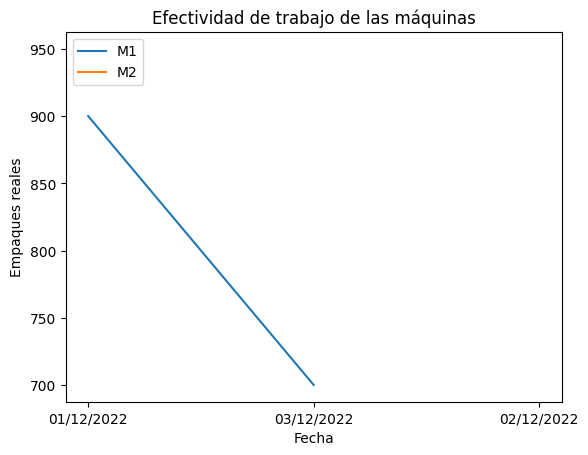

In [40]:
# Gráficos de efectividad de trabajo de las máquinas en el tiempo
datos_m1 = data[data["Maquina"] == "M1"]
datos_m2 = data[data["Maquina"] == "M2"]

plt.plot(datos_m1["Fecha"], datos_m1["Empaque Real"], label="M1")
plt.plot(datos_m2["Fecha"], datos_m2["Empaque Real"], label="M2")
plt.legend()
plt.title("Efectividad de trabajo de las máquinas")
plt.xlabel("Fecha")
plt.ylabel("Empaques reales")
plt.show()

In [31]:
# Guardar los datos actualizados en un archivo CSV
data.to_csv("datos_empaque.csv", index=False)

In [42]:
# Guardar los datos actualizados en un archivo Excel
data.to_excel('datos_empaque.xlsx', index=False)